In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [31]:
with open('models\modelo_posicion_ormuneca\prediccionesA.json', 'r') as file:
    predictionsA = json.load(file)

with open('models\modelo_posicion_ormuneca\prediccionesE.json', 'r') as file:
    predictionsE = json.load(file)

with open('models\modelo_posicion_ormuneca\prediccionesI.json', 'r') as file:
    predictionsI = json.load(file)

with open('models\modelo_posicion_ormuneca\prediccionesO.json', 'r') as file:
    predictionsO = json.load(file)

with open('models\modelo_posicion_ormuneca\prediccionesU.json', 'r') as file:
    predictionsU = json.load(file)

with open('models\modelo_posicion_ormuneca\prediccionesnone.json', 'r') as file:
    predictionsnone = json.load(file)

In [32]:
targetsA = [0] * len(predictionsA)
targetsE = [1] * len(predictionsE)
targetsI = [2] * len(predictionsI)
targetsO = [3] * len(predictionsO)
targetsU = [4] * len(predictionsU)
targetsNone = [5] * len(predictionsnone)

In [33]:
y_test = np.concatenate([targetsA, targetsE, targetsI, targetsO, targetsU, targetsNone])
y_pred = np.concatenate([predictionsA, predictionsE, predictionsI, predictionsO, predictionsU, predictionsnone])

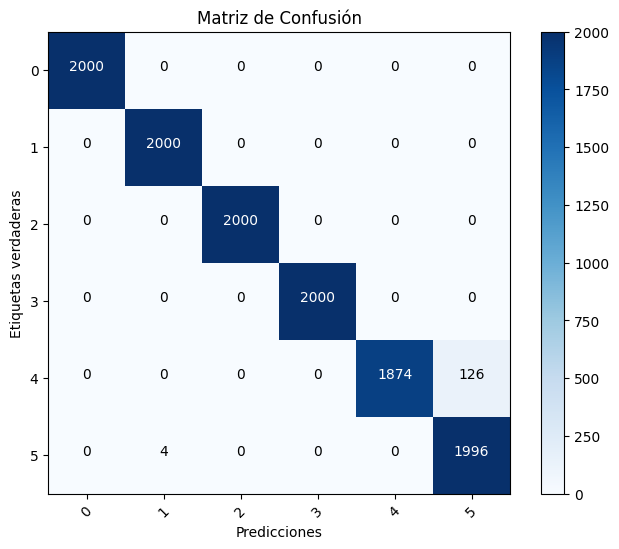

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from itertools import product

# Obtener la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')

# Anotar los valores en cada celda de la matriz
thresh = confusion_mat.max() / 2.
for i, j in product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
    plt.text(j, i, format(confusion_mat[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mat[i, j] > thresh else "black")

# Calcular la ROC AUC para cada clase
n_classes = len(np.unique(y_test))
roc_auc = []
for i in range(n_classes):
    roc_auc.append(roc_auc_score(label_binarize(y_test, classes=np.unique(y_test))[:, i],
                                 label_binarize(y_pred, classes=np.unique(y_test))[:, i]))




In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9891666666666666


In [36]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000
           4       1.00      0.94      0.97      2000
           5       0.94      1.00      0.97      2000

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



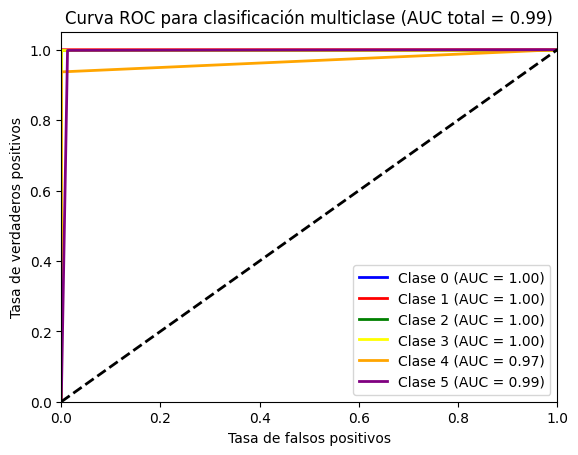

In [37]:
# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(label_binarize(y_test, classes=np.unique(y_test))[:, i],
                                              label_binarize(y_pred, classes=np.unique(y_test))[:, i])

# Calcular el AUC total
roc_auc_total = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)),
                              label_binarize(y_pred, classes=np.unique(y_test)), average='macro')

# Plotear las curvas ROC para cada clase
plt.figure()
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple'])  # Colores para cada clase
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para clasificación multiclase (AUC total = {0:0.2f})'.format(roc_auc_total))
plt.legend(loc="lower right")
plt.show()

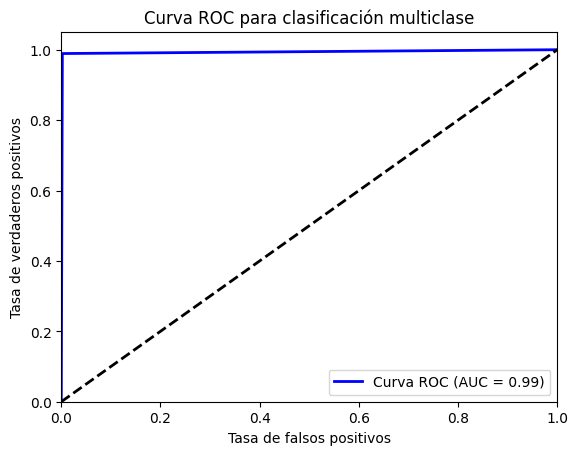

In [38]:

# Binarizar las etiquetas verdaderas y las predicciones
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Calcular la curva ROC y el AUC macro
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc_macro = roc_auc_score(y_test_bin, y_pred_bin, average='macro')

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {0:0.2f})'.format(roc_auc_macro))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para clasificación multiclase')
plt.legend(loc="lower right")
plt.show()